In [62]:
# Imports 
# Import necessary librairies
!pip install missingno
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [63]:
# Importing the dataset and first look 
beer_receipe=pd.read_csv('new_beer_train.csv')
beer_receipe.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,6,18.93,1.072,1.015,7.45,29.94,5.44,20.82,60,1.065,70.0,2.00,Specific Gravity,All Grain,0.35,26.67,Saison
1,7,21.00,1.050,1.009,5.41,111.28,5.78,28.50,60,1.037,65.0,5.00,Specific Gravity,All Grain,1.00,19.00,American Pale Ale
2,9,41.64,1.075,1.017,7.61,70.45,9.29,49.21,60,1.064,70.0,1.25,Specific Gravity,All Grain,0.75,17.78,American IPA
3,14,58.67,1.059,1.011,6.32,43.17,6.48,71.92,65,1.048,62.0,1.50,Specific Gravity,All Grain,1.00,23.89,Saison
4,15,20.82,1.069,1.014,7.20,104.21,8.78,28.39,60,1.050,60.0,1.50,Specific Gravity,All Grain,1.25,19.44,American IPA


In [64]:
# Check the shape of dataset
beer_receipe.shape

(9099, 17)

In [65]:
# Check the info of dataset
beer_receipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9099 non-null   int64  
 1   Size(L)        9099 non-null   float64
 2   OG             9099 non-null   float64
 3   FG             9099 non-null   float64
 4   ABV            9099 non-null   float64
 5   IBU            9099 non-null   float64
 6   Color          9099 non-null   float64
 7   BoilSize       9099 non-null   float64
 8   BoilTime       9099 non-null   int64  
 9   BoilGravity    9099 non-null   float64
 10  Efficiency     9099 non-null   float64
 11  MashThickness  9099 non-null   float64
 12  SugarScale     9099 non-null   object 
 13  BrewMethod     9099 non-null   object 
 14  PitchRate      9099 non-null   float64
 15  PrimaryTemp    9099 non-null   float64
 16  Style          9099 non-null   object 
dtypes: float64(12), int64(2), object(3)
memory usage: 1.

In [66]:
# No missing values in dataset 

In [67]:
# Cateogrical features in dataset
print( list(beer_receipe.select_dtypes(include=object).columns))

['SugarScale', 'BrewMethod', 'Style']


In [68]:
# Numerical features in dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
print( list(beer_receipe.select_dtypes(include=numerics).columns))

['Id', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp']


SugarScale has 0 null values


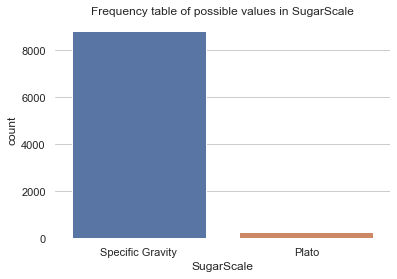

In [69]:
# So then let's have a closer look at the 3  categorical features:
ax = sns.countplot(x='SugarScale', data=beer_receipe)
ax.set(title='Frequency table of possible values in SugarScale')
sns.despine(left=True, bottom=True)

print('SugarScale has {} null values'.format(beer_receipe.SugarScale.isnull().sum()))

BrewMethod has 0 null values


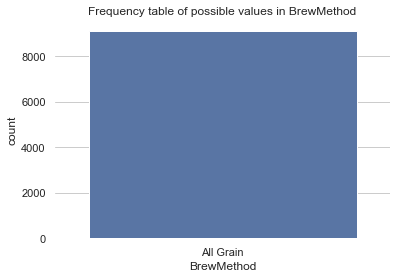

In [70]:
ax = sns.countplot(x='BrewMethod', data=beer_receipe)
ax.set(title='Frequency table of possible values in BrewMethod')
sns.despine(left=True, bottom=True)

print('BrewMethod has {} null values'.format(beer_receipe.BrewMethod.isnull().sum()))

Style has 0 null values


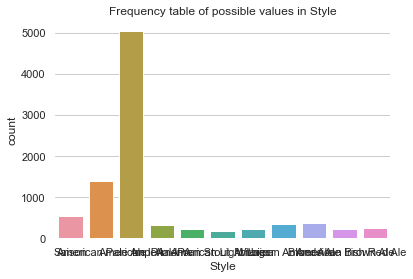

In [71]:
ax = sns.countplot(x='Style', data=beer_receipe)
ax.set(title='Frequency table of possible values in Style')
sns.despine(left=True, bottom=True)

print('Style has {} null values'.format(beer_receipe.BrewMethod.isnull().sum()))

In [72]:
# First, ID is part of our class, so this is not a feature.

# But all the other features seems like they are good numerical features and don't have any "problems" that we've uncovered yet.

In [73]:
# Get the statistics of the numerical features
def get_sg_from_plato(plato):
    sg = 1 + (plato / (258.6 - ( (plato/258.2) *227.1) ) )
    return sg

beer_receipe['OG_sg'] = beer_receipe.apply(lambda row: get_sg_from_plato(row['OG']) if row['SugarScale'] == 'Plato' else row['OG'], axis=1)
beer_receipe['FG_sg'] = beer_receipe.apply(lambda row: get_sg_from_plato(row['FG']) if row['SugarScale'] == 'Plato' else row['FG'], axis=1)
beer_receipe['BoilGravity_sg'] = beer_receipe.apply(lambda row: get_sg_from_plato(row['BoilGravity']) if row['SugarScale'] == 'Plato' else row['BoilGravity'], axis=1)

In [74]:
num_feats_list = ['Size(L)', 'OG_sg', 'FG_sg', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity_sg', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp']
beer_receipe.loc[:, num_feats_list].describe().T

,count,mean,std,min,25%,50%,75%,max
Size(L),9099.0,52.409094,197.934651,1.89,20.500,20.820,30.000,5850.000
OG_sg,9099.0,1.059861,0.013090,1.00,1.052,1.058,1.066,1.500
FG_sg,9099.0,1.013343,0.004332,1.00,1.011,1.013,1.016,1.119
ABV,9099.0,6.112086,1.361060,0.00,5.270,5.970,6.780,49.960
IBU,9099.0,54.944371,40.279746,0.00,30.360,45.020,67.880,671.670
Color,9099.0,9.923881,8.360675,0.03,5.240,7.100,10.870,50.000
BoilSize,9099.0,60.975811,211.880396,3.03,26.500,28.390,35.980,5850.000
BoilTime,9099.0,66.049896,12.598966,0.00,60.000,60.000,60.000,180.000
BoilGravity_sg,9099.0,1.047471,0.013119,1.00,1.040,1.046,1.053,1.500
Efficiency,9099.0,71.015397,7.620112,0.80,70.000,70.000,75.000,100.000


In [75]:
# With just this table, we can see the following:
#     The numerical features in this dataset are on different scales (OG and FG have low std, but other fields like Size or BoilSize have very high std). This means that some sort of scaling is absolutely necessary
#     Every numerical feature will have some important outliers (the only by exception being PitchRate) because the max value is always very far away from the 75 percentile.
#     That third point is pretty important, we should have a look at boxplots for these features.

In [76]:
#should define a function that will categorize the features automatically
vlow_scale_feats = ['OG_sg', 'FG_sg', 'BoilGravity_sg', 'PitchRate']
low_scale_feats = ['ABV', 'MashThickness']
mid_scale_feats = ['Color', 'BoilTime', 'Efficiency', 'PrimaryTemp']
high_scale_feats = ['IBU', 'Size(L)',  'BoilSize']

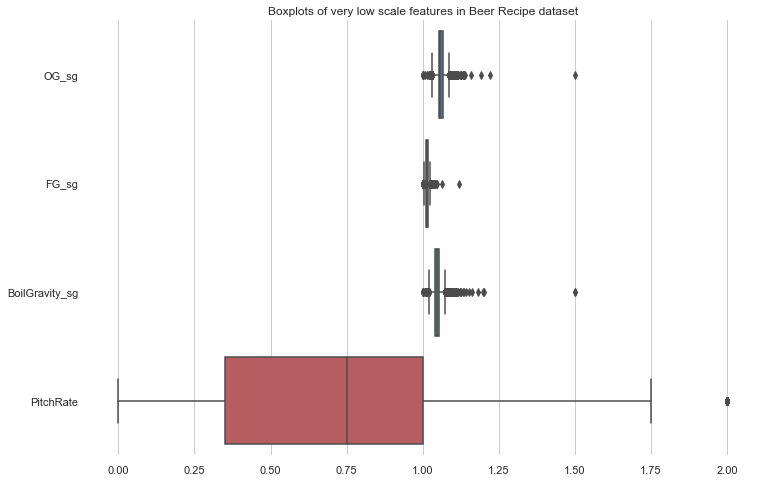

In [77]:
# Checking outliers 
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_receipe.loc[:, vlow_scale_feats], orient='h')
ax.set(title='Boxplots of very low scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

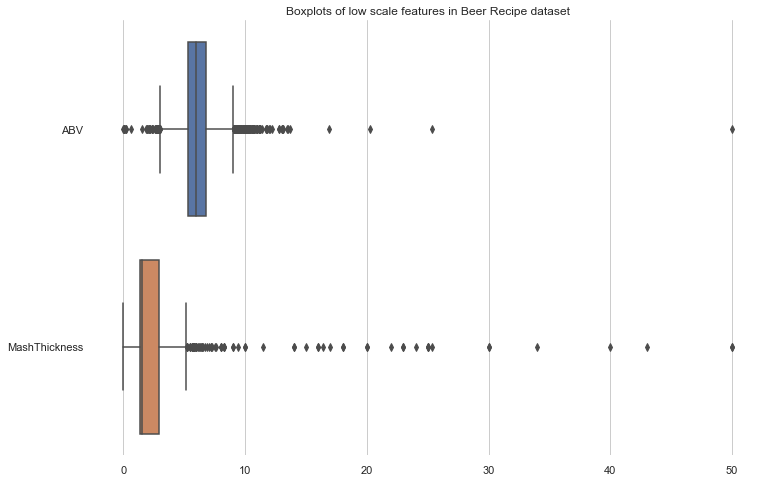

In [78]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_receipe.loc[:, low_scale_feats], orient='h')
ax.set(title='Boxplots of low scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

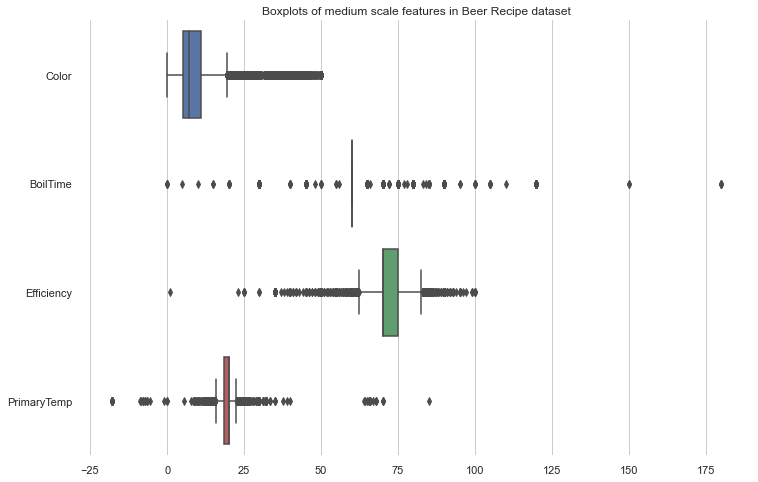

In [79]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_receipe.loc[:, mid_scale_feats], orient='h')
ax.set(title='Boxplots of medium scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

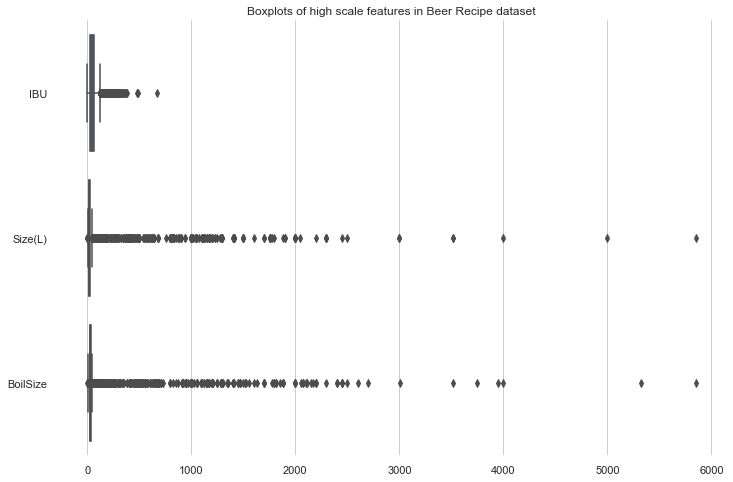

In [80]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_receipe.loc[:, high_scale_feats], orient='h')
ax.set(title='Boxplots of high scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

In [81]:
# Seperated the fields by scale so that each plot would make a bit of sense and not have any features "overpowered" by other... but even by doing that, the sheer number of outliers in each features just distort each and every plot.
# This type of situation is to be expected when dealing with so many different classes, the data for each of those features when seperated by style might make more sense. We'll have to investigate that further.

In [82]:
# Class Imbalance 
# If the final purpose of this exploratory analysis is to help in setting up a classifier, we have to look at the classes that we have. It's important to define if we have some sort of class imbalance within the dataset.
# The classes in this dataset are the individual Style under which each beer is classified and each style is part of a group of styles. On the Brewers' Friends website, the data is entered in 2 drop-down lists. Here in the data, we only have the individual style under the Style and StyleID columns.

In [83]:
print('There are {} different styles of beer'.format(beer_receipe.Id.nunique()))

There are 8395 different styles of beer


In [84]:
style_cnt = beer_receipe.loc[:,['Style']]
style_cnt['Count'] = 1
style_cnt_grp = style_cnt.loc[:,['Style','Count']].groupby('Style').sum()
style_cnt_grp

,Count
Style,
American Amber Ale,355
American Brown Ale,216
American IPA,5042
American Light Lager,182
American Pale Ale,1381
American Stout,221
Blonde Ale,361
Imperial IPA,320
Irish Red Ale,248


In [85]:
style_cnt_grp.reset_index(level=0, inplace=True)

In [86]:
style_cnt_grp

,Style,Count
0,American Amber Ale,355
1,American Brown Ale,216
2,American IPA,5042
3,American Light Lager,182
4,American Pale Ale,1381
5,American Stout,221
6,Blonde Ale,361
7,Imperial IPA,320
8,Irish Red Ale,248
9,Saison,549


C:\Users\esomish\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  del sys.path[0]


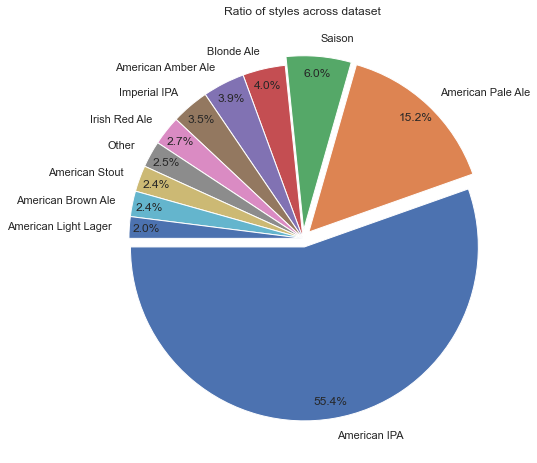

In [87]:
# Get top10 styles
top10_style = list(style_cnt_grp['Style'][:10].values)
# Group by current count information computed earlier and group every style not in top20 together
style_cnt_other = style_cnt_grp.loc[:, ['Style','Count']]
style_cnt_other.Style = style_cnt_grp.Style.apply(lambda x: x if x in top10_style else 'Other')
style_cnt_other = style_cnt_other.groupby('Style').sum()
# Get ratio of each style
style_cnt_other['Ratio'] = style_cnt_other.Count.apply(lambda x: x/float(len(beer_receipe)))
style_cnt_other = style_cnt_other.sort_values('Count', ascending=False)

f, ax = plt.subplots(figsize=(8, 8))
explode = (0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(x=style_cnt_other['Ratio'], labels=list(style_cnt_other.index), startangle = 180, autopct='%1.1f%%', pctdistance= .9, explode=explode)
plt.title('Ratio of styles across dataset')
plt.show()

In [88]:
# Just with the top 10 styles, we can see that they make up about 45% of the data.
# But even then, the ratio drops severely just after the 2 first style: American IPA and American Pale Ale.
# There's a clear imbalance between the classes and we'll have to deal with that when comes time to build the classifier. It would be cool to have the "grouping" of styles that the Brewers' Friend website uses in the first dropdown to reduce the number of classes to a more manageable level. I'll see if I can figure out a quick way to bring in that data.

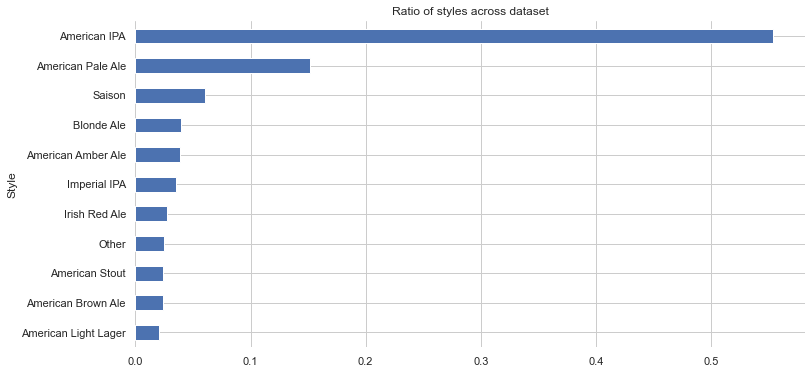

In [89]:
# Let's try to present the same thing using a bar chart:
#plt.barh(list(style_cnt_other.index), style_cnt_other['Count'])
style_cnt_other['Ratio'].plot(kind='barh', figsize=(12,6),)
plt.title('Ratio of styles across dataset')
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()

In [90]:
# Correlations
# Are there any correlations between the fields in the dataset ???

# For this part of the analysis, I'll focus on the fields which we know are more "reliable" (as per the notes and our previous analysis of null values):

# Original Gravity (OG)
# Final Gravity (FG)
# Alcohol by Volume (ABV)
# Internation Bitterness Units (IBU)
# Color

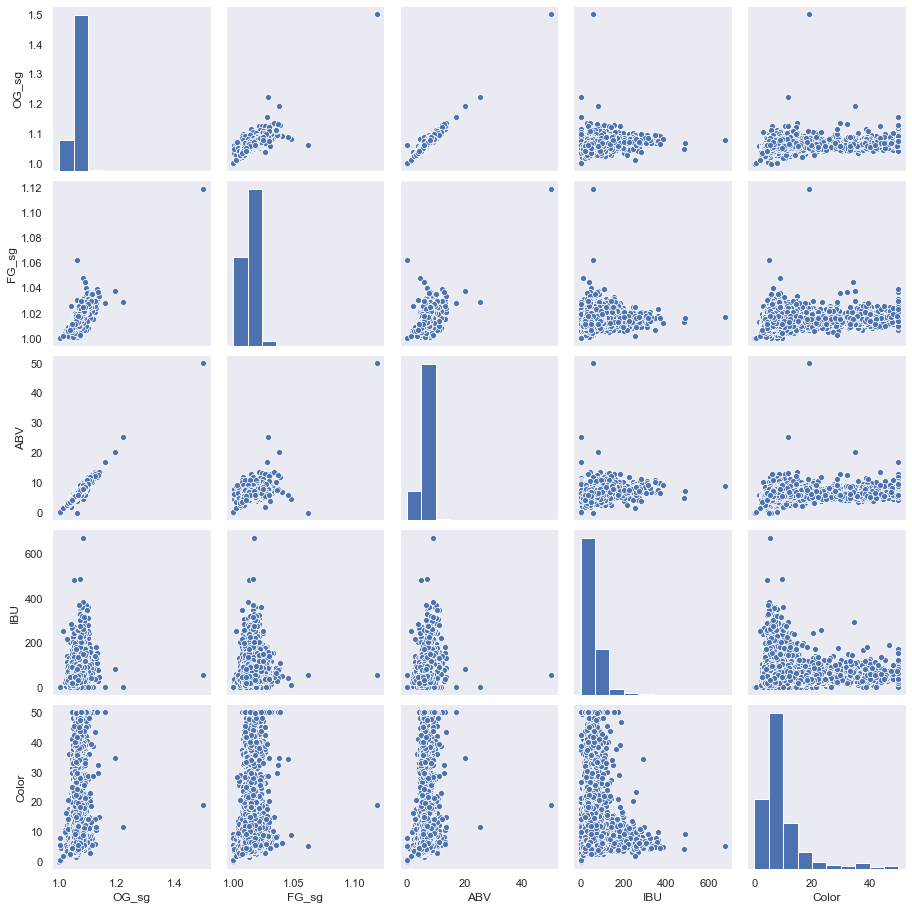

In [91]:
# create specific df that only contains the fields we're interested in
pairplot_df = beer_receipe.loc[:, ['Style','OG_sg','FG_sg','ABV','IBU','Color']]

# create the pairplot
sns.set(style="dark")
sns.pairplot(data=pairplot_df)
plt.show()

In [92]:
# This might not be the best way to look at this type of information...
# The diagonal plots are really weird and it's hard to see if there is any semblance of distributions. The main reason seems to be based on the scale of the x axis that's always too large. So this points to the presence of significant outliers within each of those fields.
# These outliers could be related to certains styles having extreme values, or just plain user error, since all these recipes are entered manually. Let's see if we can spot those outliers in the most popular styles...

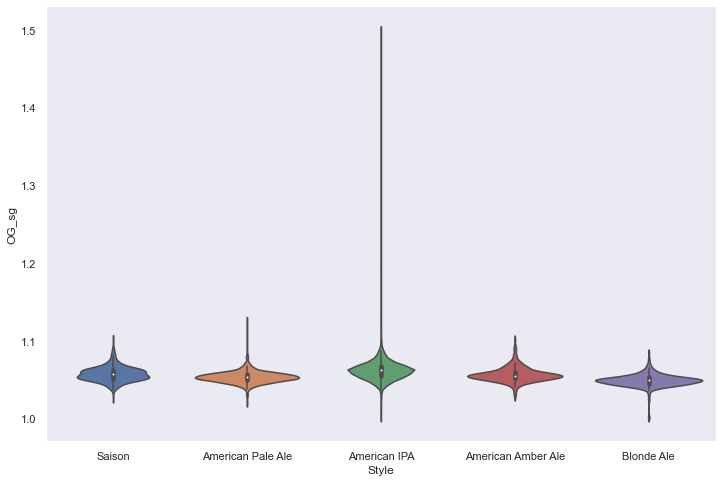

In [93]:
style_cnt_grp = style_cnt_grp.sort_values('Count', ascending=False)
top5_style = list(style_cnt_grp['Style'][:5].values)

top5_style_df = pairplot_df[pairplot_df['Style'].isin(top5_style)]

f, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x='Style', y='OG_sg',data=top5_style_df)
plt.show()

# American IPA style has the outliers

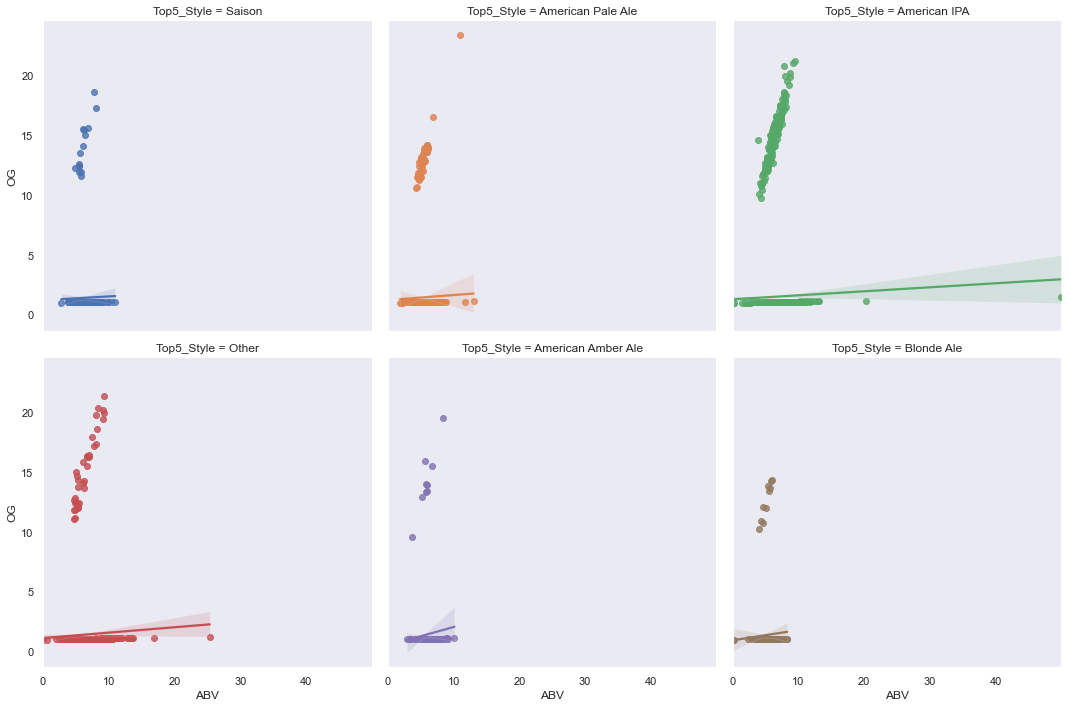

In [94]:
# ABV vs. Original Gravity
# Get Top5 styles
top5_style = list(style_cnt_grp['Style'][:5].values)
beer_receipe['Top5_Style'] = beer_receipe.Style.apply(lambda x: x if x in top5_style else 'Other')

# Create Reg plot
sns.lmplot(x='ABV', y='OG', hue='Top5_Style', col='Top5_Style', col_wrap=3, data=beer_receipe, n_boot=100)

In [95]:
# Doesn't seem to be the case (that the linear relationship is based on styles - each of the Top5 styles each have values in both "lines".
# Now let's look at the same thing but with the realigned OG field and see the difference:


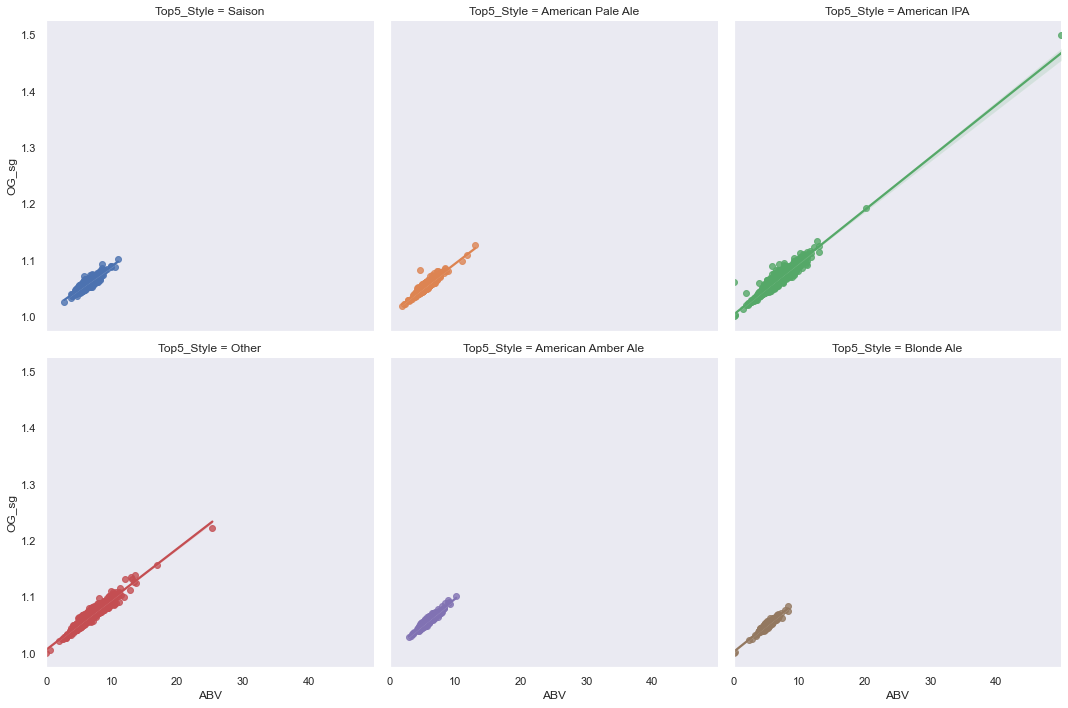

In [96]:
# Create Reg plot
sns.lmplot(x='ABV', y='OG_sg', hue='Top5_Style', col='Top5_Style', col_wrap=3, data=beer_receipe, n_boot=100)

In [97]:
# Preprocessing the data 
# But before we can start looking at the Regressor, we'll have to preprocess our data to be able to use it to train our model.

# The steps I'll need to go through are:

# Label-encoding the categorical features I'll use
# Fill null values in some of the numerical features (if I decide to use them)
# Seperate Target Classes from the Features
# Perform a Train-Test Split so we can evaluate the Regressor on part of the data

In [98]:
# imports
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')


In [99]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [100]:
features_list= [
                'OG_sg','FG_sg','ABV','IBU','Color', 
                'SugarScale', 'BrewMethod', 
                'Size(L)', 'BoilSize', 'BoilTime', 'BoilGravity_sg', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp']

In [101]:
clf_data = beer_receipe.loc[:, features_list]

In [102]:
# Label encoding
cat_feats_to_use = list(clf_data.select_dtypes(include=object).columns)
for feat in cat_feats_to_use:
    encoder = LabelEncoder()
    clf_data[feat] = encoder.fit_transform(clf_data[feat])

# Fill null values
num_feats_to_use = list(clf_data.select_dtypes(exclude=object).columns)
for feat in num_feats_to_use:
    imputer = SimpleImputer(strategy='median')
    clf_data[feat] = imputer.fit_transform(clf_data[feat].values.reshape(-1,1))

In [103]:
clf_data

,OG_sg,FG_sg,ABV,IBU,Color,SugarScale,BrewMethod,Size(L),BoilSize,BoilTime,BoilGravity_sg,Efficiency,MashThickness,PitchRate,PrimaryTemp
0,1.072,1.015,7.45,29.94,5.44,1.0,0.0,18.93,20.82,60.0,1.065,70.0,2.00,0.35,26.67
1,1.050,1.009,5.41,111.28,5.78,1.0,0.0,21.00,28.50,60.0,1.037,65.0,5.00,1.00,19.00
2,1.075,1.017,7.61,70.45,9.29,1.0,0.0,41.64,49.21,60.0,1.064,70.0,1.25,0.75,17.78
3,1.059,1.011,6.32,43.17,6.48,1.0,0.0,58.67,71.92,65.0,1.048,62.0,1.50,1.00,23.89
4,1.069,1.014,7.20,104.21,8.78,1.0,0.0,20.82,28.39,60.0,1.050,60.0,1.50,1.25,19.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9094,1.036,1.007,3.77,46.17,2.55,1.0,0.0,20.82,23.85,30.0,1.031,85.0,1.50,0.35,19.44
9095,1.053,1.011,5.52,48.08,9.47,1.0,0.0,50.00,64.00,60.0,1.042,75.0,2.80,0.75,19.00
9096,1.044,1.011,4.29,18.16,4.55,1.0,0.0,130.00,150.00,60.0,1.038,80.0,3.30,0.75,16.00
9097,1.064,1.018,6.05,31.95,5.52,1.0,0.0,37.85,51.10,90.0,1.047,70.0,1.50,1.00,26.67


In [104]:
# Seperate Targets from Features
X = clf_data.iloc[:, clf_data.columns != 'Efficiency']
y = clf_data.iloc[:, 11]

In [105]:
X

,OG_sg,FG_sg,ABV,IBU,Color,SugarScale,BrewMethod,Size(L),BoilSize,BoilTime,BoilGravity_sg,MashThickness,PitchRate,PrimaryTemp
0,1.072,1.015,7.45,29.94,5.44,1.0,0.0,18.93,20.82,60.0,1.065,2.00,0.35,26.67
1,1.050,1.009,5.41,111.28,5.78,1.0,0.0,21.00,28.50,60.0,1.037,5.00,1.00,19.00
2,1.075,1.017,7.61,70.45,9.29,1.0,0.0,41.64,49.21,60.0,1.064,1.25,0.75,17.78
3,1.059,1.011,6.32,43.17,6.48,1.0,0.0,58.67,71.92,65.0,1.048,1.50,1.00,23.89
4,1.069,1.014,7.20,104.21,8.78,1.0,0.0,20.82,28.39,60.0,1.050,1.50,1.25,19.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9094,1.036,1.007,3.77,46.17,2.55,1.0,0.0,20.82,23.85,30.0,1.031,1.50,0.35,19.44
9095,1.053,1.011,5.52,48.08,9.47,1.0,0.0,50.00,64.00,60.0,1.042,2.80,0.75,19.00
9096,1.044,1.011,4.29,18.16,4.55,1.0,0.0,130.00,150.00,60.0,1.038,3.30,0.75,16.00
9097,1.064,1.018,6.05,31.95,5.52,1.0,0.0,37.85,51.10,90.0,1.047,1.50,1.00,26.67


In [106]:
y

0       70.0
1       65.0
2       70.0
3       62.0
4       60.0
        ... 
9094    85.0
9095    75.0
9096    80.0
9097    70.0
9098    70.0
Name: Efficiency, Length: 9099, dtype: float64

In [107]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=35)

In [108]:
X.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OG_sg           9099 non-null   float64
 1   FG_sg           9099 non-null   float64
 2   ABV             9099 non-null   float64
 3   IBU             9099 non-null   float64
 4   Color           9099 non-null   float64
 5   SugarScale      9099 non-null   float64
 6   BrewMethod      9099 non-null   float64
 7   Size(L)         9099 non-null   float64
 8   BoilSize        9099 non-null   float64
 9   BoilTime        9099 non-null   float64
 10  BoilGravity_sg  9099 non-null   float64
 11  MashThickness   9099 non-null   float64
 12  PitchRate       9099 non-null   float64
 13  PrimaryTemp     9099 non-null   float64
dtypes: float64(14)
memory usage: 995.3 KB


In [109]:
# Scaling features 
# Since we've seen earlier that the numerical features are on totally different scales, we need to bring them to the same scale.

In [110]:
# imports
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Efficiency   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     35.62
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           8.40e-88
Time:                        10:52:05   Log-Likelihood:                -24753.
No. Observations:                7279   AIC:                         4.953e+04
Df Residuals:                    7265   BIC:                         4.963e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.0706      0.085    835.012      0.000      70.904      71.237
x1            -4.9335      2.107     -2.341      0.019      -9.065      -0.802
x2             1.6333      0.703      2.323      0.020       0.255       3.012
x3             4.4240      1.668      2.652      0.008       1.153       7.695
x4            -0.8419      0.095     -8.896      0.000      -1.027      -0.656
x5            -0.6860      0.088     -7.752      0.000      -0.859      -0.513
x6            -0.1242      0.086     -1.441      0.150      -0.293       0.045
x7          4.228e-15   2.75e-15      1.536      0.124   -1.17e-15    9.62e-15
x8            -2.0949      1.380     -1.518      0.129      -4.800       0.610
x9             2.9478      1.378      2.140      0.032       0.247       5.649
x10            0.1830      0.086      2.116      0.034       0.013       0.353
x11            0.8777      0.129      6.810      0.000       0.625       1.130
x12            0.1061      0.086      1.235      0.217      -0.062       0.274
x13            0.4368      0.087      5.035      0.000       0.267       0.607
x14           -0.3311      0.086     -3.869      0.000      -0.499      -0.163
==============================================================================
Omnibus:                     2288.186   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13807.513
Skew:                          -1.370   Prob(JB):                         0.00
Kurtosis:                       9.166   Cond. No.                     5.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#x6, x7,x8 and x12 have value greater then 0.05 significance value but they seems imp variable for the analysis
# Sugarscale,BrewMethod, Size(L) and MashThickness

In [111]:
#sanity check again
sanity_df = pd.DataFrame(X_train, columns = X.columns)
sanity_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OG_sg,7279.0,2.914126e-16,1.000069,-4.542507,-0.593406,-0.137740,0.469814,33.429624
FG_sg,7279.0,3.731853e-15,1.000069,-3.054979,-0.536154,-0.078185,0.608767,24.194132
ABV,7279.0,1.279372e-16,1.000069,-4.463303,-0.611134,-0.099461,0.492619,32.055553
IBU,7279.0,6.467022e-18,1.000069,-1.344947,-0.602688,-0.247097,0.318655,15.155227
Color,7279.0,1.988838e-16,1.000069,-1.186566,-0.560463,-0.336941,0.117915,4.818491
SugarScale,7279.0,4.979150e-17,1.000069,-5.625056,0.177776,0.177776,0.177776,0.177776
BrewMethod,7279.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Size(L),7279.0,-2.588716e-16,1.000069,-0.250371,-0.161230,-0.158086,-0.113333,28.259708
BoilSize,7279.0,1.359257e-16,1.000069,-0.269996,-0.162016,-0.153320,-0.118308,26.630561
BoilTime,7279.0,-5.957439e-16,1.000069,-5.191770,-0.487226,-0.487226,-0.095181,8.921861


In [112]:
# Training the classifier 
#imports
from sklearn.linear_model import LinearRegression


In [113]:
regr = LinearRegression()  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.05241551051282478


In [114]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(regr, X, y, cv=6)
predictions

array([72.28627832, 69.49796015, 72.75357936, ..., 71.66702278,
       72.02503999, 71.88510089])

Cross-Predicted Accuracy: 0.04817726810394096


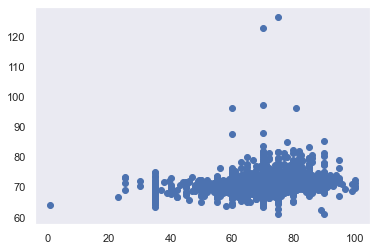

In [115]:
from sklearn import metrics
from matplotlib import pyplot as plt
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

In [116]:
# Accuracy predicted is not good we can try different models as regressior to get the good accuracy